In [1]:
"""
Probablistic Machine Learning - Task List 3
"""

%matplotlib inline
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
# Utils
def animate_frame_histogram(idx, subplot, get_data_fn):
    subplot.clear()
    sns.distplot(get_data_fn(idx), kde=False)
    
def make_animation(animation_fn, begin_idx, nb_steps, get_data_fn, skip_frame=1):
    fig, plot = plt.subplots(1, 1)
    anim = animation.FuncAnimation(fig, animation_fn,
                                  frames=range(begin_idx, nb_steps, skip_frame),
                                  interval=50,
                                  fargs=(plot, get_data_fn))
    return anim

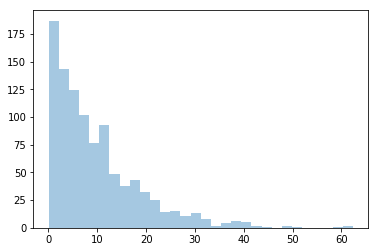

In [3]:
# Exercise 1
# Simple introduction
def generate_samples(k, n, scale=5):
    return np.random.exponential(scale=scale, size=(k, n))


def exercise_1_1(k, n_max, scale):
    means = []
    
    for idx in range(1, n_max + 1):
        samples = generate_samples(k, idx, scale=scale)
        means.append(np.mean(samples, axis=1))
    
    return make_animation(animate_frame_histogram, 
                          0, n_max,
                          lambda i: means[i])
    
        

scale = 10
k = 1000  # nb samples    
n_max = 25  # single sample size
anim = exercise_1_1(k, n_max, scale)
HTML(anim.to_jshtml())

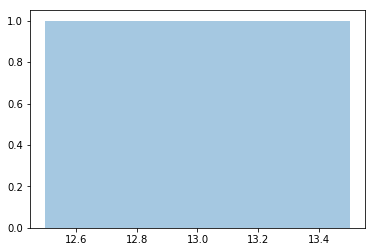

In [23]:
def exercise_1_2(n, p, nb_trials):
    nb_successes = np.random.binomial(n, p, nb_trials)
    
    return make_animation(animate_frame_histogram,
                          1, nb_trials,
                          lambda i: nb_successes[:i],
                          skip_frame=100)
    

N = 30
P = 0.5
NB_TRIALS = 1000
anim = exercise_1_2(N, P, NB_TRIALS)
HTML(anim.to_jshtml())

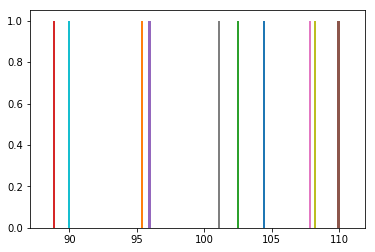

In [41]:
# Multinomial
def exercise_1_3(nb_experiments, nb_probs, nb_trials):
    data = np.random.multinomial(nb_experiments, [1.0/nb_probs] * nb_probs, nb_trials)
    
    def anim(idx, subplot, get_data_fn):
        subplot.clear()
        subplot.hist(get_data_fn(idx))
    
    return make_animation(anim,
                          1, nb_trials,
                          lambda i: data[:i],
                          skip_frame=10)
    

NB_EXPERIMENTS = 1000
NB_PROBS = 10
NB_TRIALS = 100
anim = exercise_1_3(NB_EXPERIMENTS, NB_PROBS, NB_TRIALS)
HTML(anim.to_jshtml())

In [8]:
# Exercise 2
def load_abalone_dataset():
    attributes = ['Sex', 'Length', 'Diameter', 'Height', 
                  'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'
                 ] 
    target= 'Rings'
    df_abalone = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                              header=None, names=attributes + [target])
    
    # Remove non-numeric attribute 'Sex'
    del df_abalone['Sex']
    attributes.remove('Sex')
    
    return attributes, target, df_abalone


def load_airfoil_dataset():
    attributes = ['Frequency', 'Angle', 'Chord_length', 'Velocity', 'Thickness']
    target = 'Pressure_level'
    df_airfoil = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat',
                            header=None, names=attributes + [target], sep='\t')
    
    return attributes, target, df_airfoil


def plot_pairplot_of_dataset(attrs_names, target_name, data):
    sns.pairplot(data, x_vars=attrs_names, y_vars=attrs_names, hue=target_name)

    
def plot_pairplot_of_dataset_with_histograms(attrs_names, target_name, data):
    nb_attributes = len(attrs_names)

    fig = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(nb_attributes, nb_attributes)

    import itertools
    for idx, pair in enumerate(itertools.product(attrs_names, repeat=2)):
        print(pair)
        jp = sns.jointplot(x=pair[0], y=pair[1], data=data, stat_func=None)
        SeabornFig2Grid(jp, fig, gs[idx])

    gs.tight_layout(fig)
    plt.show()
   

def plot_correlation_and_covariance(attrs_names, target_name, data):
    corr = data.corr()
    cov = data.cov()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 8))

    g = sns.heatmap(corr, mask=mask, center=0, annot=True, 
                    ax=ax1, vmin=-1, vmax=1)
    g.set(title='Correlation')
    g2 = sns.heatmap(cov, mask=mask, center=0, annot=True, ax=ax2)
    g2.set(title='Covariance')
    
    fig.tight_layout()


In [3]:
attrs_names, target_name, data = load_airfoil_dataset()#load_abalone_dataset()

#print(data)

      Frequency  Angle  Chord_length  Velocity  Thickness  Pressure_level
0           800    0.0        0.3048      71.3   0.002663         126.201
1          1000    0.0        0.3048      71.3   0.002663         125.201
2          1250    0.0        0.3048      71.3   0.002663         125.951
3          1600    0.0        0.3048      71.3   0.002663         127.591
4          2000    0.0        0.3048      71.3   0.002663         127.461
5          2500    0.0        0.3048      71.3   0.002663         125.571
6          3150    0.0        0.3048      71.3   0.002663         125.201
7          4000    0.0        0.3048      71.3   0.002663         123.061
8          5000    0.0        0.3048      71.3   0.002663         121.301
9          6300    0.0        0.3048      71.3   0.002663         119.541
10         8000    0.0        0.3048      71.3   0.002663         117.151
11        10000    0.0        0.3048      71.3   0.002663         115.391
12        12500    0.0        0.3048  

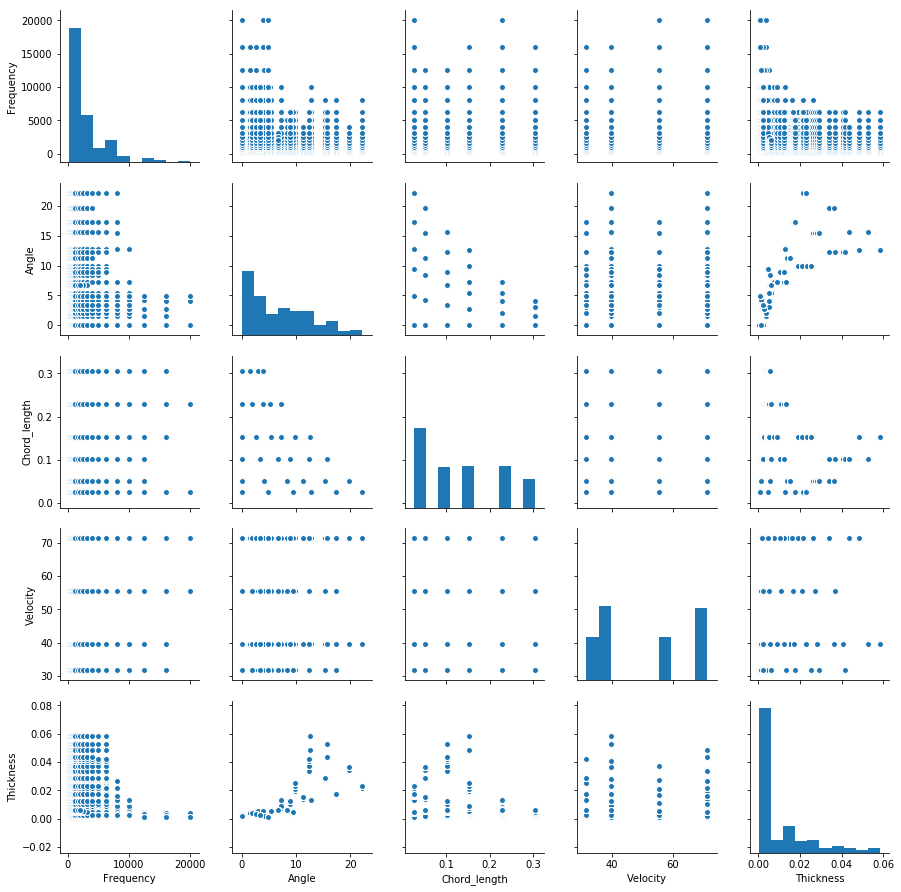

In [4]:
plot_pairplot_of_dataset(attrs_names, None, data)

In [6]:
# https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [5]:
if target_name in data.columns:
    del data[target_name]

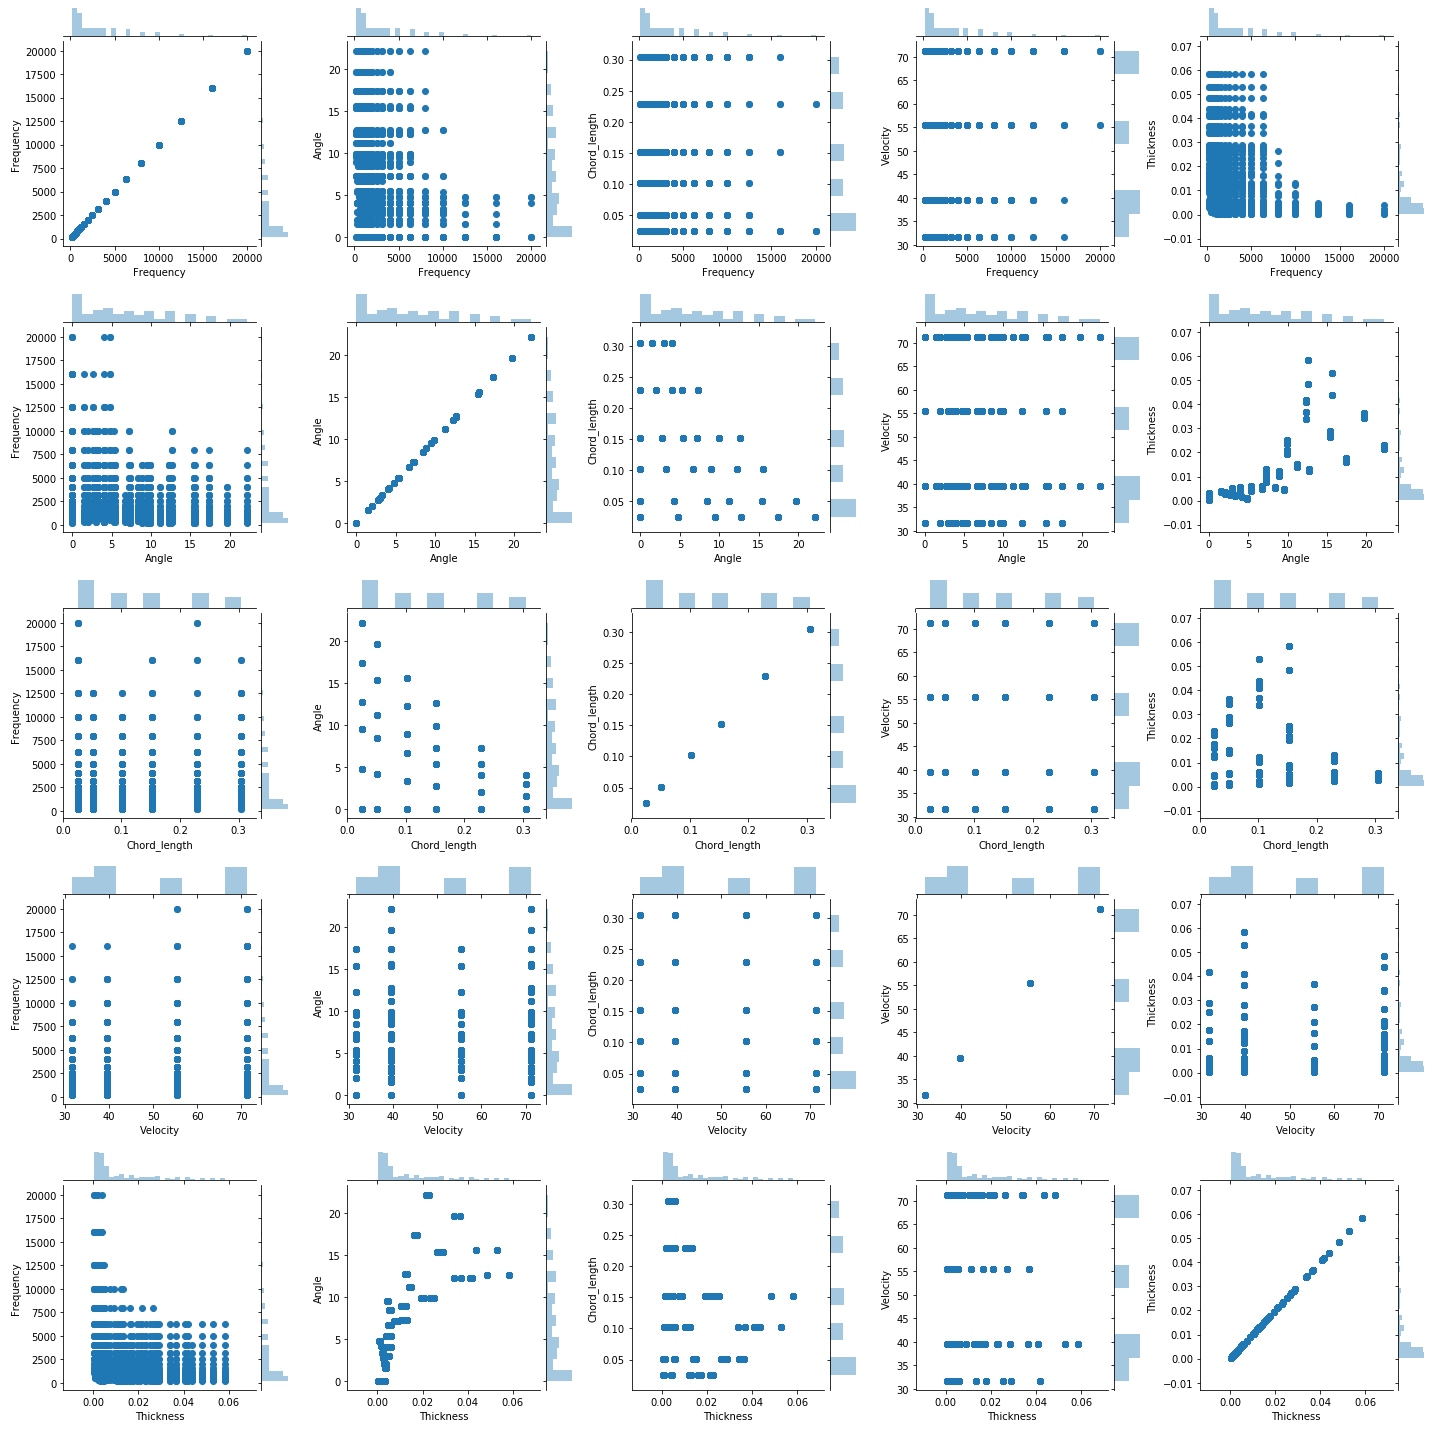

In [7]:
plot_pairplot_of_dataset_with_histograms(attrs_names, target_name, data)

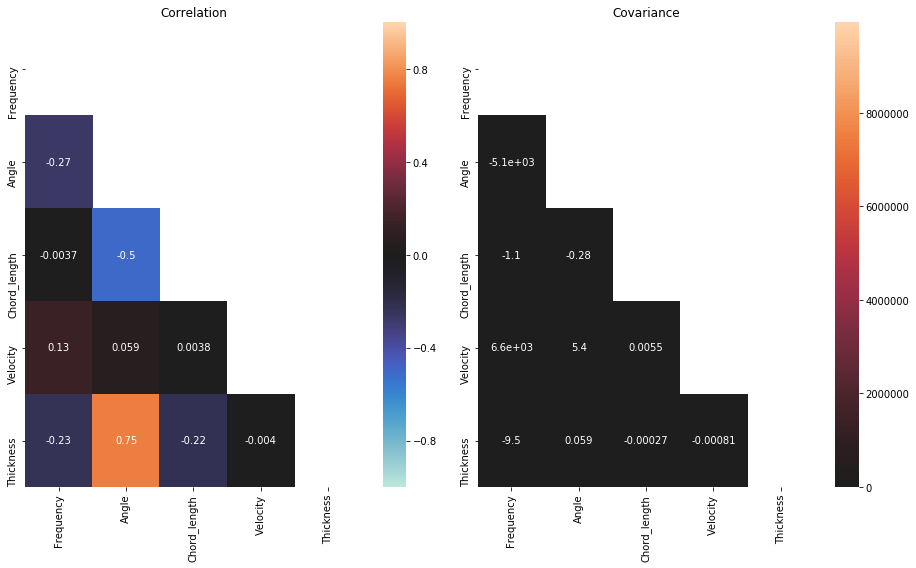

In [9]:
plot_correlation_and_covariance(attrs_names, target_name, data)